In [9]:
%pip install snntorch

Note: you may need to restart the kernel to use updated packages.


In [10]:
import torch
import torchvision
from torchvision import datasets

# definizione della cartella in cui scaricare i dati
data_root = "../data"

# help(torchvision)
# help(datasets)


# definizione del dataset MNIST e delle trasformazioni da applicare
mnist_trainset = datasets.MNIST(root=data_root, train=True, download=True, transform=None)
# definizione del dataset MNIST e delle trasformazioni da applicare
transform=torchvision.transforms.Compose([
    torchvision.transforms.Resize((28,28)),
    torchvision.transforms.Grayscale(),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.,),(1.,))
])
mnist_testset = datasets.MNIST(root=data_root, train=False, download=True, transform=transform)


Sette


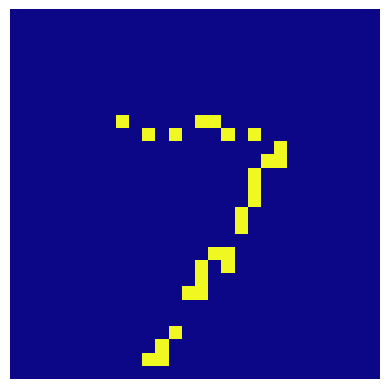

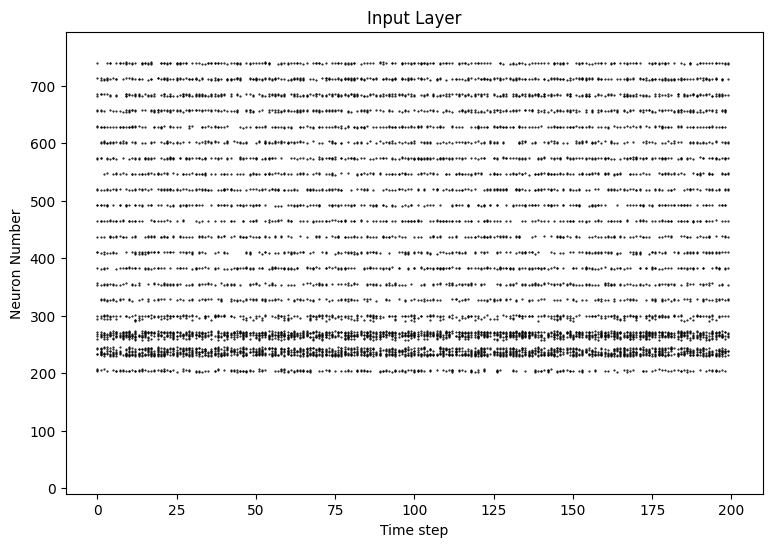

Due


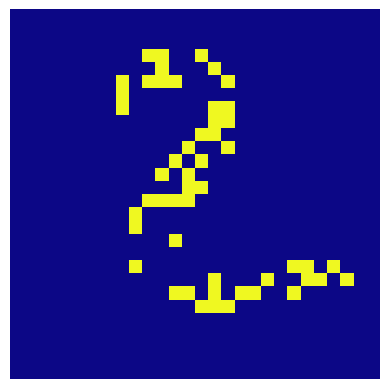

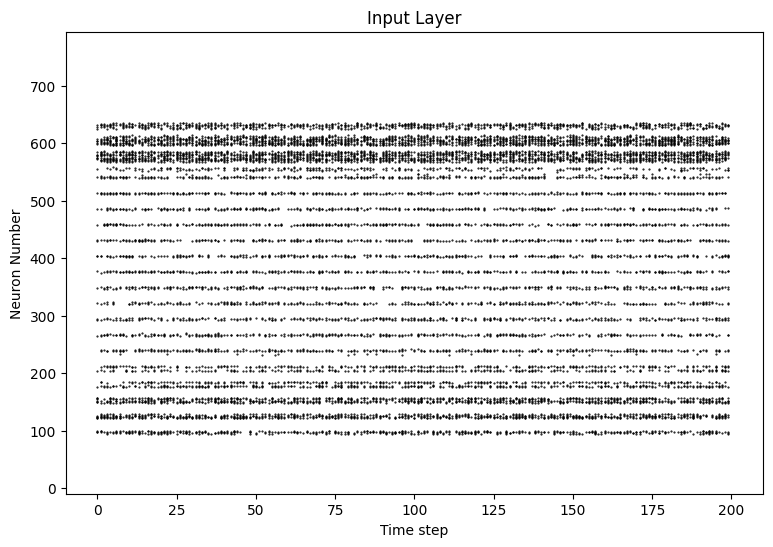

Uno


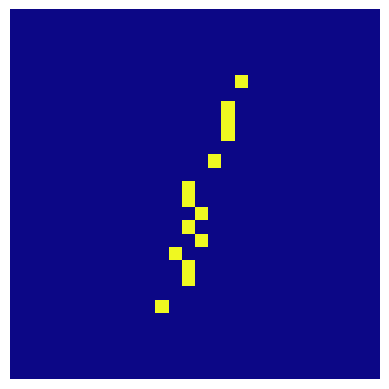

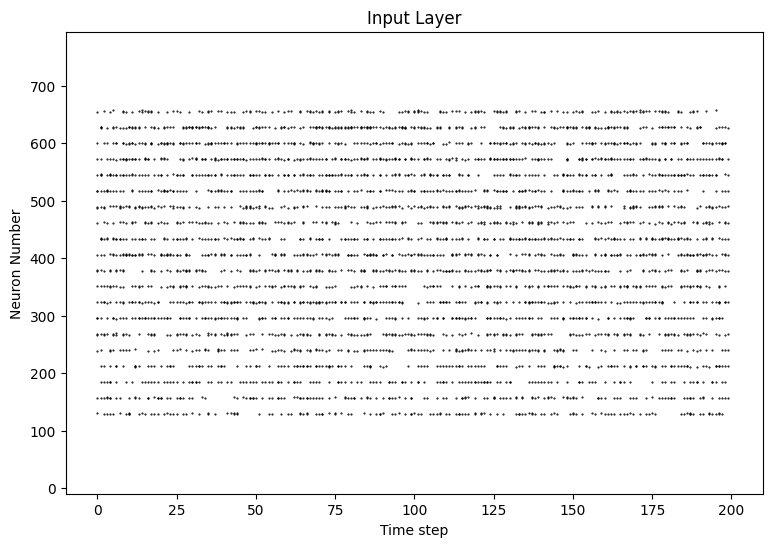

Zero


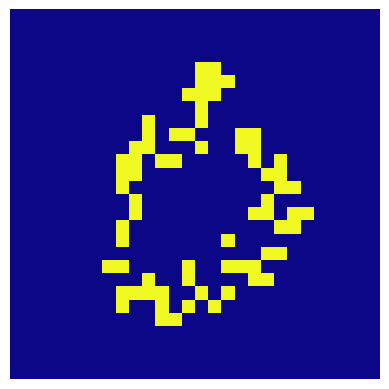

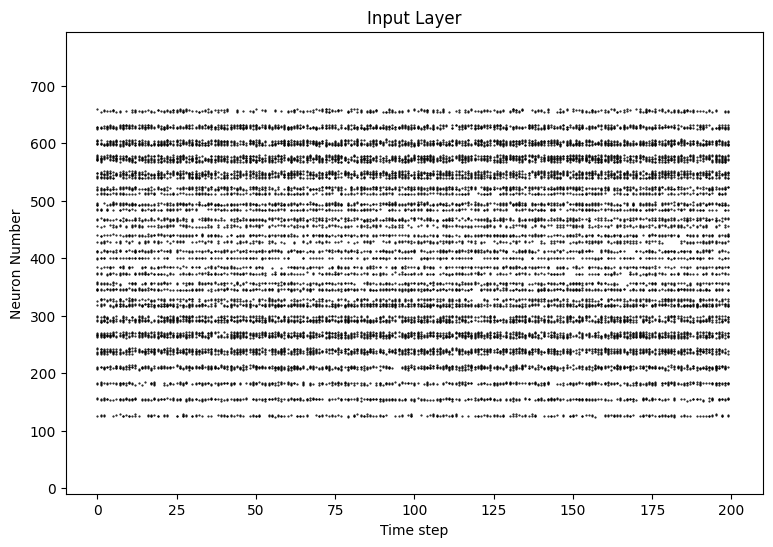

Quattro


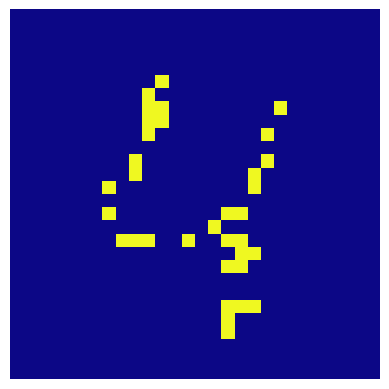

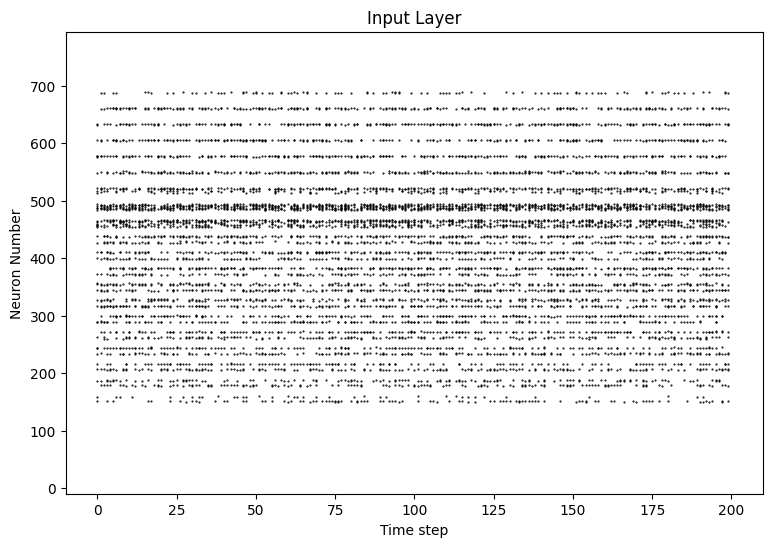

Uno


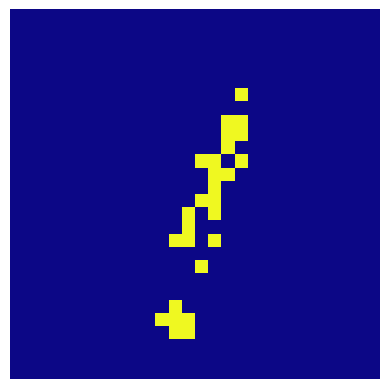

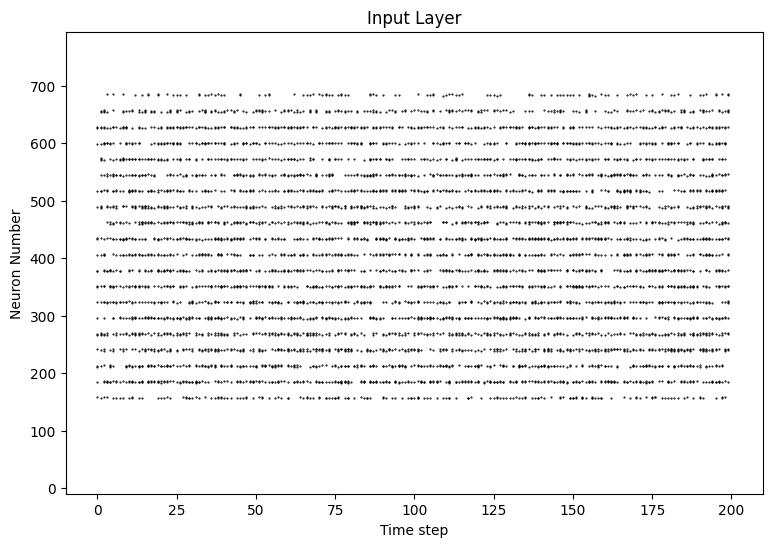

Quattro


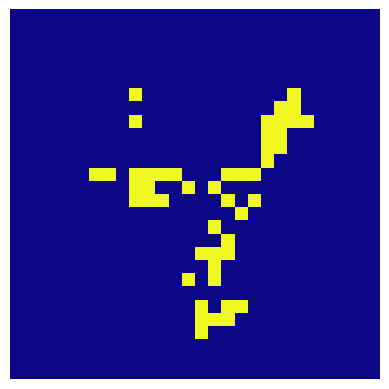

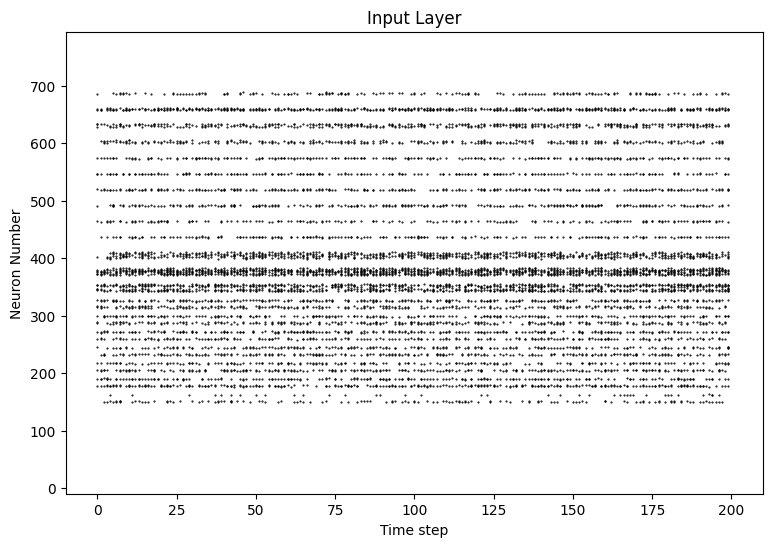

Nove


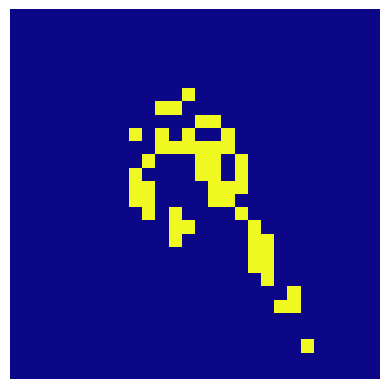

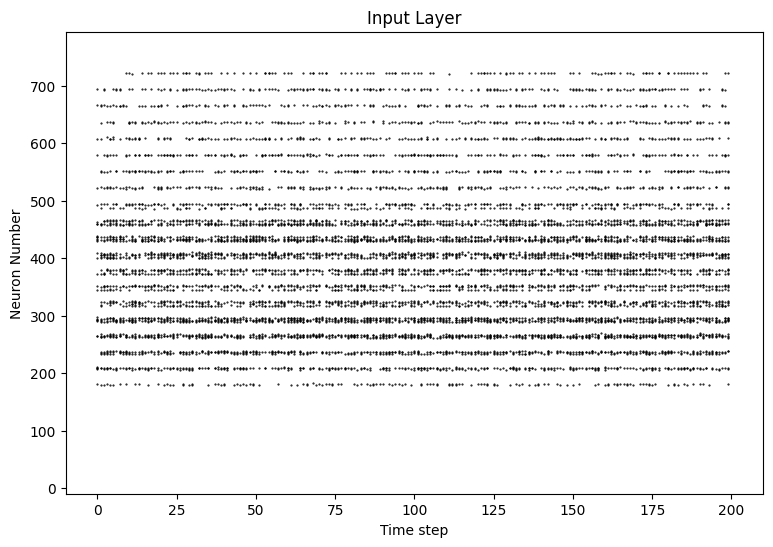

Cinque


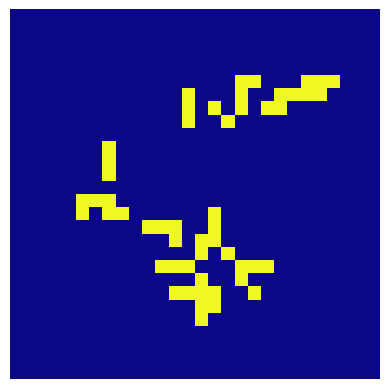

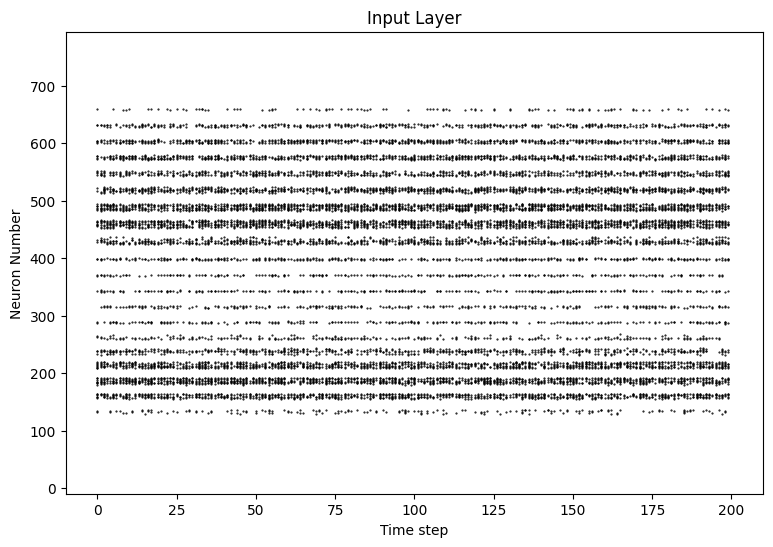

Nove


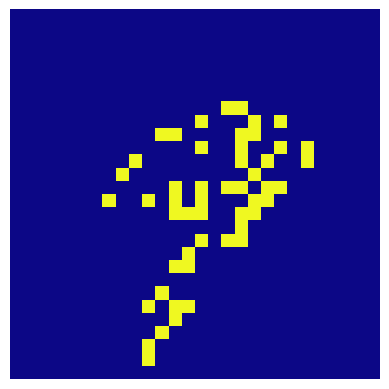

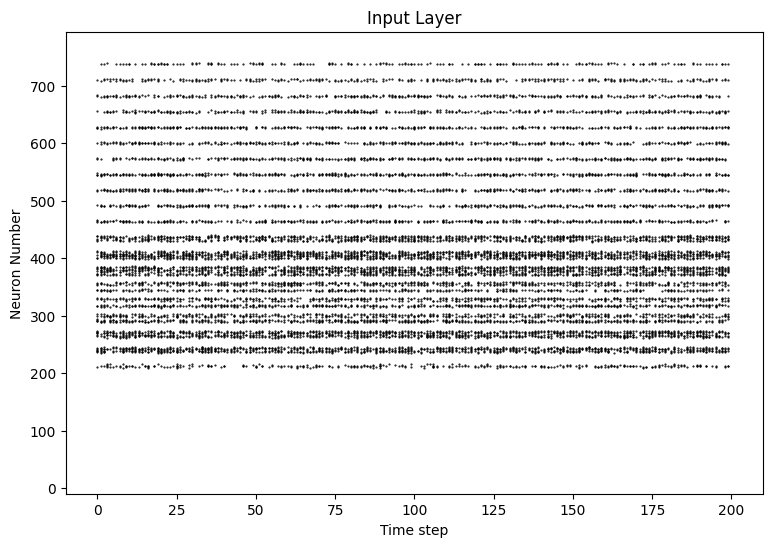

In [11]:
import ipywidgets as widgets
from snntorch import spikegen
from matplotlib import pyplot as plt
from snntorch import spikeplot as splt
from IPython.display import HTML
from torch.utils.data import DataLoader


mnist_test_loader = DataLoader(mnist_testset, 10)
dataset, target = next(iter(mnist_test_loader))
target_label = {
    0: "Zero",
    1: "Uno",
    2: "Due",
    3: "Tre",
    4: "Quattro",
    5: "Cinque",
    6: "Sei",
    7: "Sette",
    8: "Otto",
    9: "Nove"
}

i = 0
for image in dataset:
    image.cuda()
    print(target_label[target[i].item()])
    spike_data = spikegen.rate(image, num_steps=200, gain=.5)
    fig, ax = plt.subplots()
    anim = splt.animator(spike_data[:,0], fig, ax)
    anim.save(
        "../videos/rate-coding-video-MNIST-{}.mp4".format(
        target_label[target[i].item()]
        )
    )
    display( HTML( anim.to_html5_video() ) )
    fig = plt.figure(facecolor="w", figsize=(9, 6))
    ax = fig.subplots()
    ax.set_xlim((-10,210))
    ax.set_ylim((-10,794))
    splt.raster(spike_data.view(200,-1), ax, s=1, marker='.', c="black")

    plt.title("Input Layer")
    plt.xlabel("Time step")
    plt.ylabel("Neuron Number")
    plt.savefig(
        "../figures/rate-coding-MNIST-label-{}.eps".format(
            target_label[target[i].item()]
        ), format="eps")
    
    plt.savefig(
        "../figures/rate-coding-MNIST-label-{}.png".format(
            target_label[target[i].item()]
        ), format="png")
    plt.show()
    i += 1

Sette


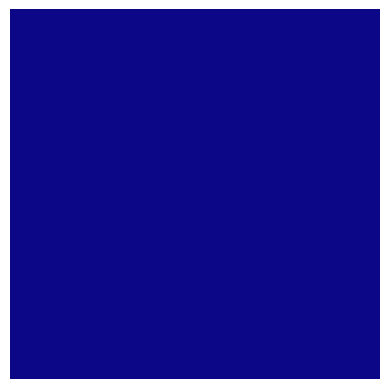

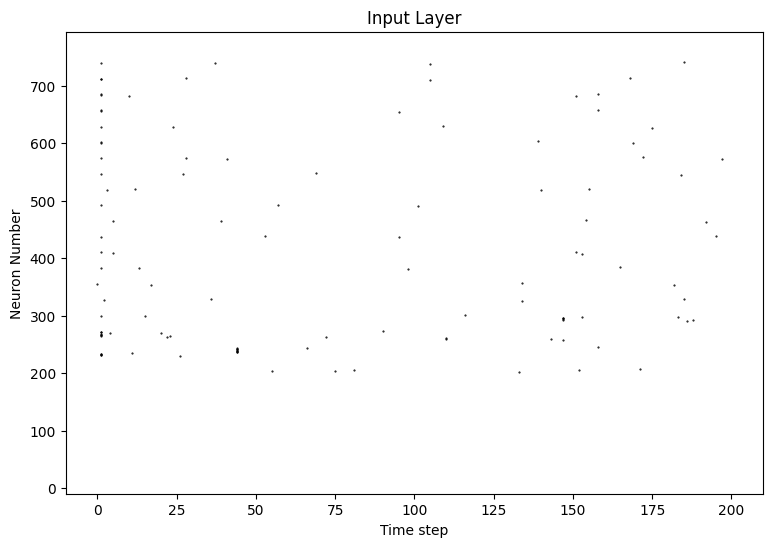

Due


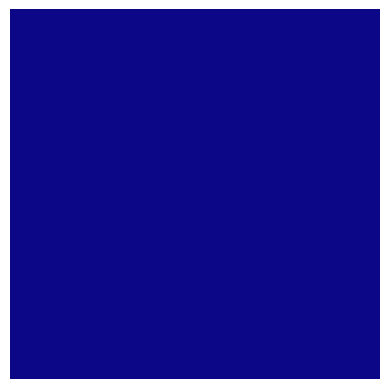

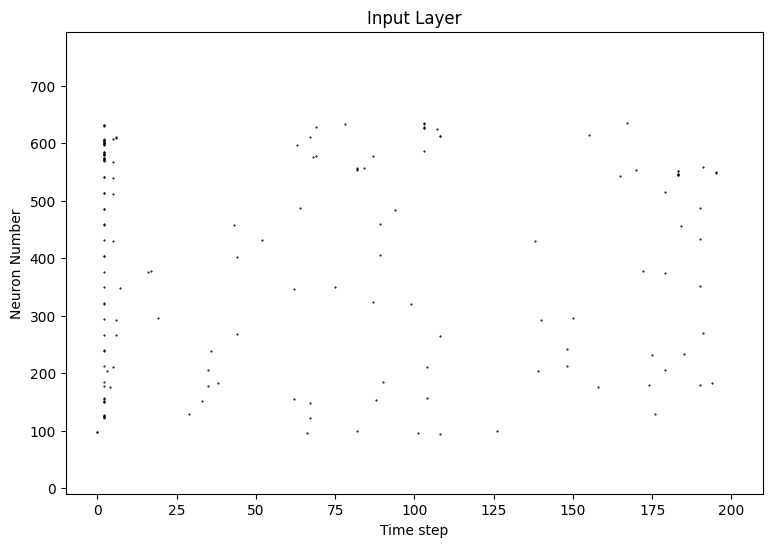

Uno


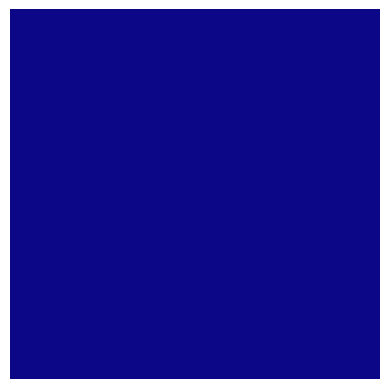

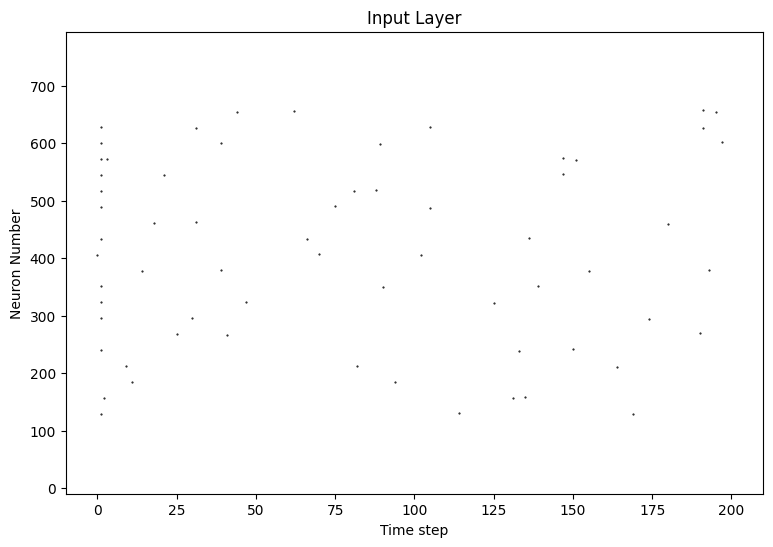

Zero


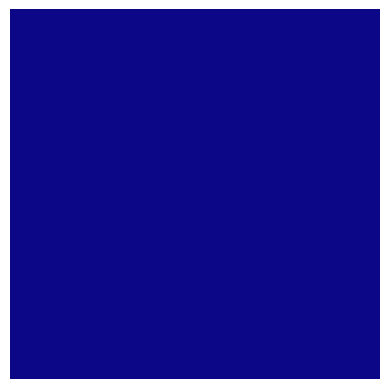

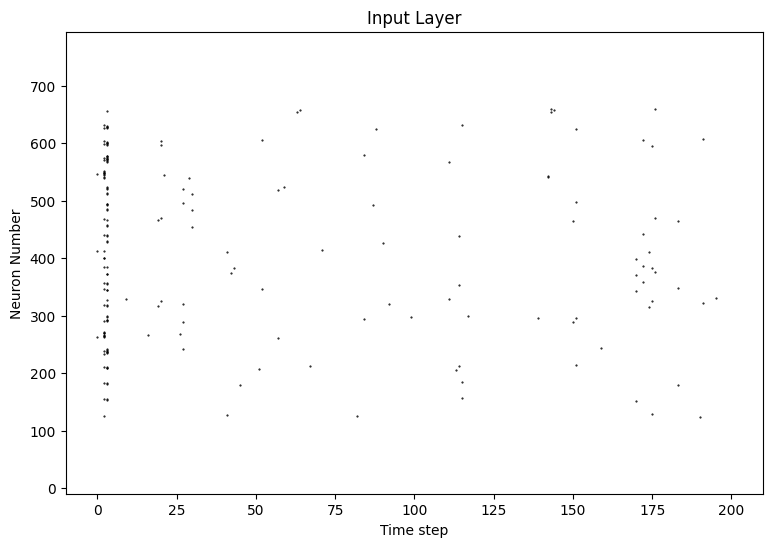

Quattro


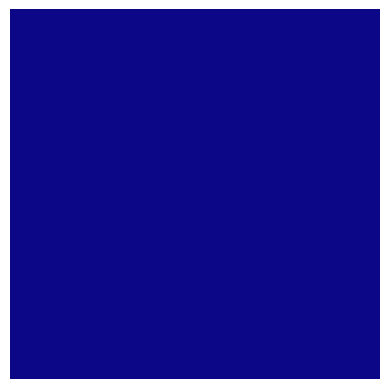

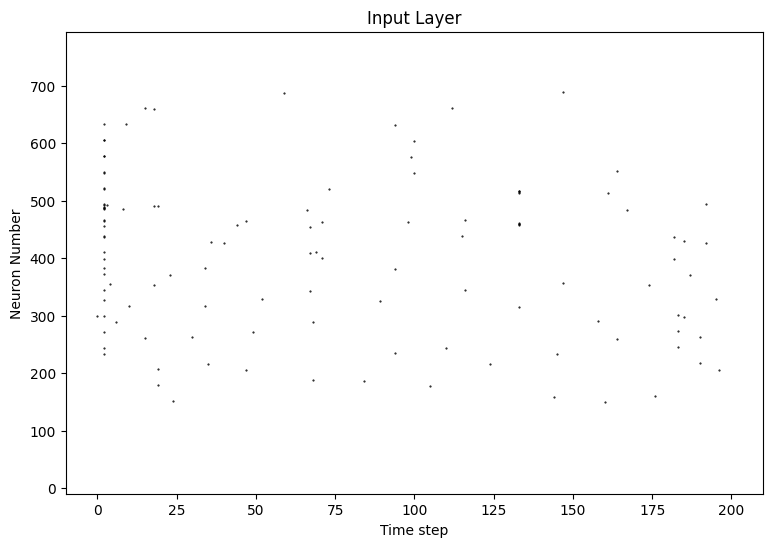

Uno


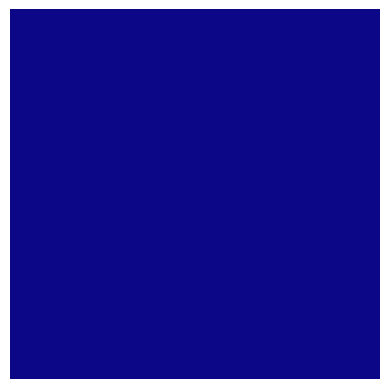

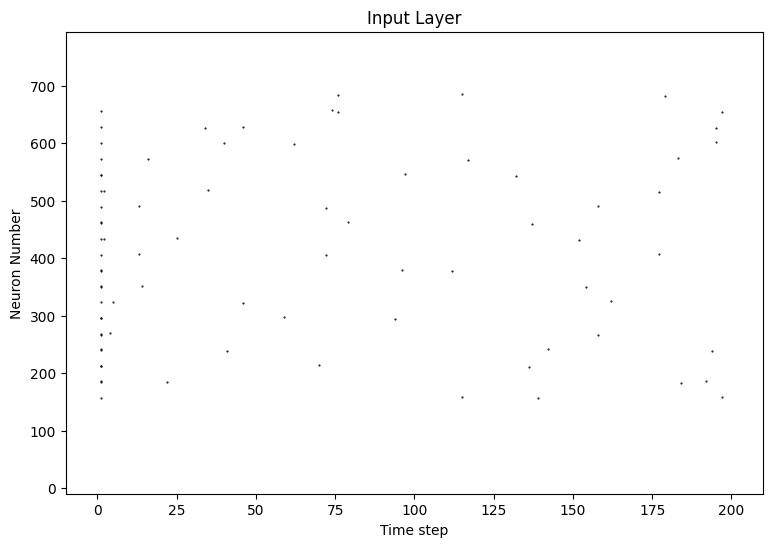

Quattro


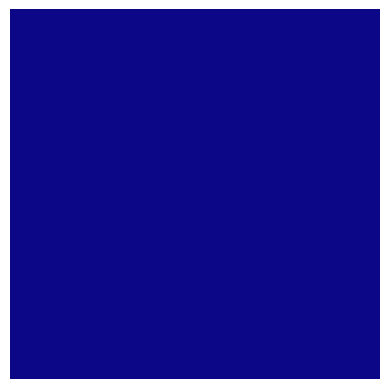

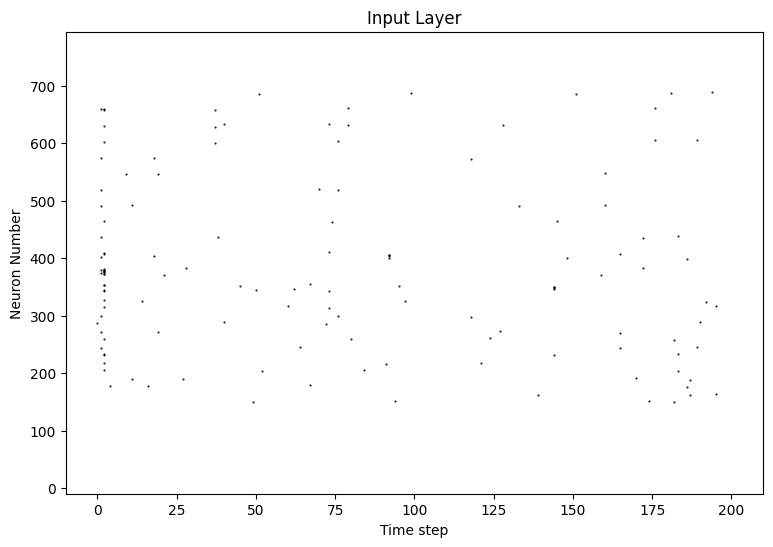

Nove


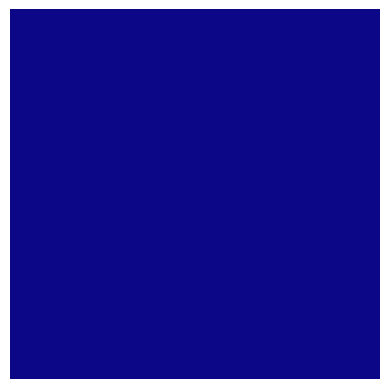

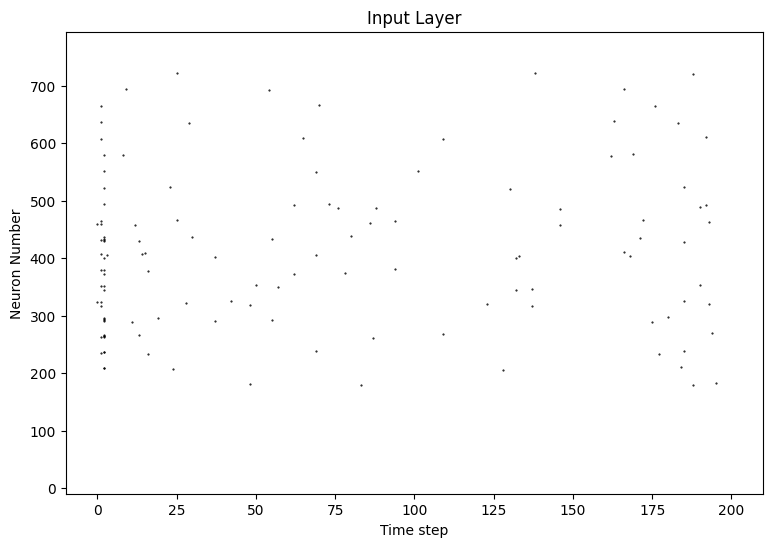

Cinque


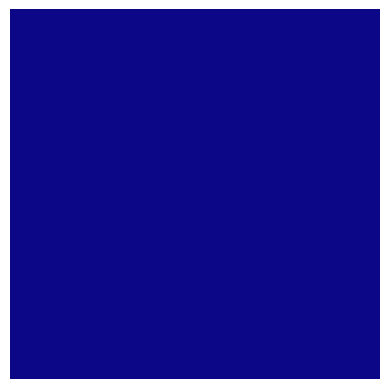

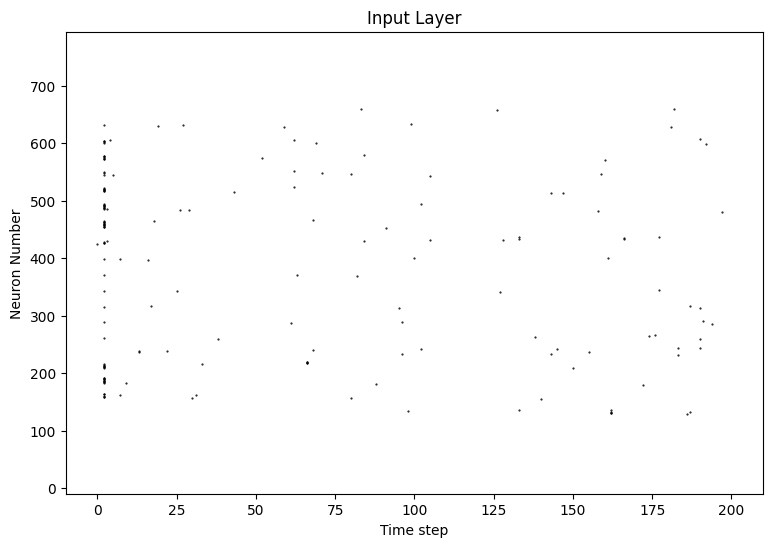

Nove


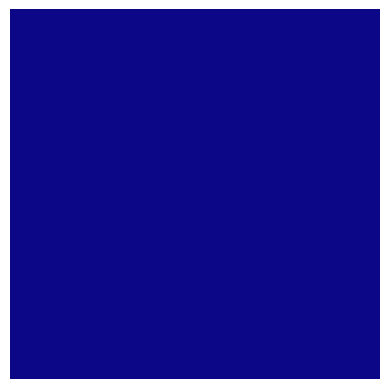

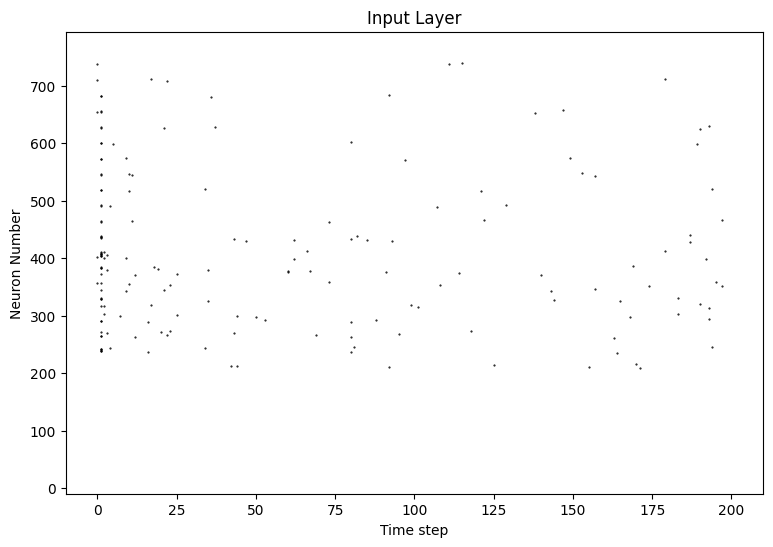

In [12]:
import ipywidgets as widgets
from snntorch import spikegen
from matplotlib import pyplot as plt
from snntorch import spikeplot as splt
from IPython.display import HTML
from torch.utils.data import DataLoader


mnist_test_loader = DataLoader(mnist_testset, 10)
dataset, target = next(iter(mnist_test_loader))

i = 0
for image in dataset:
    image.cuda()
    print(target_label[target[i].item()])
    spike_data = spikegen.latency(image, num_steps=200, normalize=True, clip=True, linear=True)
    fig, ax = plt.subplots()
    anim = splt.animator(spike_data[:,0], fig, ax)
    anim.save(
        "../videos/latency-coding-video-MNIST-{}.mp4".format(
        target_label[target[i].item()]
        )
    )
    display( HTML( anim.to_html5_video() ) )
    fig = plt.figure(facecolor="w", figsize=(9, 6))
    ax = fig.subplots()
    ax.set_xlim((-10,210))
    ax.set_ylim((-10,794))
    splt.raster(spike_data.view(200,-1), ax, s=1, marker='.', c="black")

    plt.title("Input Layer")
    plt.xlabel("Time step")
    plt.ylabel("Neuron Number")
    plt.savefig(
        "../figures/latency-coding-FMNIST-label-{}.eps".format(
            target_label[target[i].item()]
        ), format="eps")
    
    plt.savefig(
        "../figures/latency-coding-FMNIST-label-{}.png".format(
            target_label[target[i].item()]
        ), format="png")
    plt.show()
    i += 1